In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as op
import numpy as np

# for plotting
sns.set(style='ticks', font_scale=1.5, context='poster')
%matplotlib inline

/Users/sgagnon/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/sgagnon/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [41]:
ratings_file = '/Volumes/group/awagner/sgagnon/SST/analysis/behav/group_inscanratings.csv'
group_file = '/Users/sgagnon/Experiments/SST/data/subj_info_str.csv'

In [66]:
group_info = pd.read_csv(group_file)
d = pd.read_csv(ratings_file)
d = d.merge(group_info).drop('remove', axis=1)
d.head()

,subid,rating,run1,run2,run3,run4,run5,run6,run7,run8,group
0,sst01,Anxious,1,1,1,1,2,1,1,1,control
1,sst01,Happy,3,3,3,3,3,3,4,4,control
2,sst01,Safe,4,4,2,4,1,4,4,4,control
3,sst01,Stressed,2,2,1,2,1,1,1,1,control
4,sst01,Emotional arousal,2,2,3,2,2,2,2,2,control


In [94]:
group_info

,subid,group,remove
0,sst01,control,NaN
1,sst02,control,NaN
2,sst03,control,NaN
3,sst04,control,NaN
4,sst05,control,NaN
5,sst06,control,NaN
6,sst07,control,NaN
7,sst09,control,NaN
8,sst10,control,NaN
9,sst11,control,NaN


In [67]:
d = pd.melt(d, id_vars=['subid', 'rating', 'group'], var_name='run')
d['other'] = np.nan
d[['other', 'run']] = d.run.str.split('run').tolist()
d.drop('other', axis=1, inplace=True)
d.head()

,subid,rating,group,run,value
0,sst01,Anxious,control,1,1
1,sst01,Happy,control,1,3
2,sst01,Safe,control,1,4
3,sst01,Stressed,control,1,2
4,sst01,Emotional arousal,control,1,2


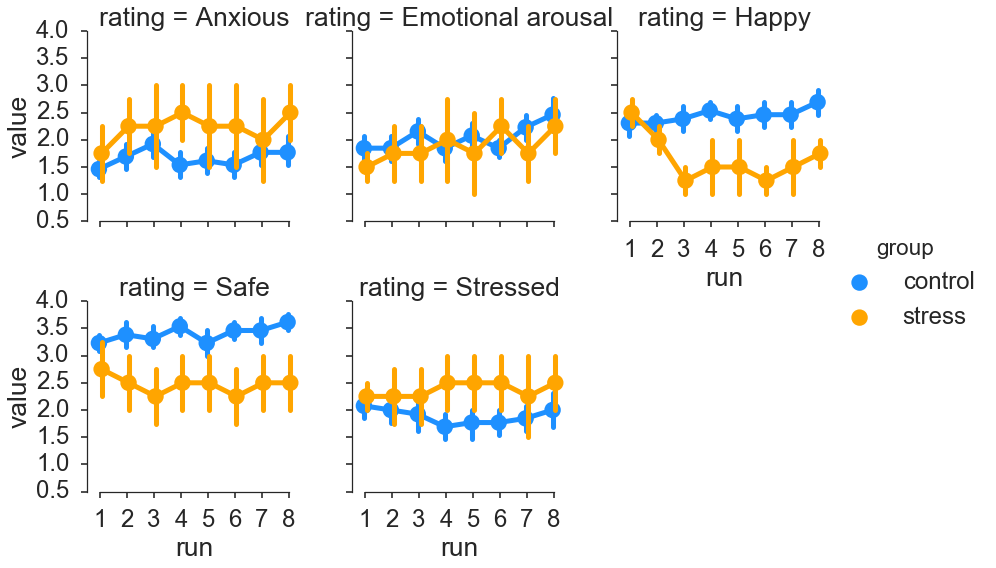

In [98]:
p = sns.factorplot(x='run', y='value', hue='group', col='rating', col_wrap=3,
                   palette=['dodgerblue', 'orange'],
                   data=d, ci=68, dodge=.1, aspect=1, units='subid')
sns.despine(trim=True)

## Compute composite scores

In [88]:
d_neg = pd.DataFrame(d.loc[d.rating == 'Anxious',['subid', 'run', 'group']])
d_neg['negative'] =(d.loc[d.rating == 'Anxious','value'].values + d.loc[d.rating == 'Stressed','value'].values)/2

d_pos = pd.DataFrame(d.loc[d.rating == 'Happy',['subid', 'run', 'group']])
d_pos['positive'] =(d.loc[d.rating == 'Happy','value'].values + d.loc[d.rating == 'Safe','value'].values)/2

In [89]:
d_valence = pd.merge(d_neg, d_pos)
d_valence = pd.melt(d_valence, id_vars=['subid', 'run', 'group'], 
                    var_name='valence', value_name='rating')
d_valence.head()

,subid,run,group,valence,rating
0,sst01,1,control,negative,1
1,sst02,1,control,negative,2
2,sst03,1,control,negative,1
3,sst04,1,control,negative,2
4,sst05,1,control,negative,1


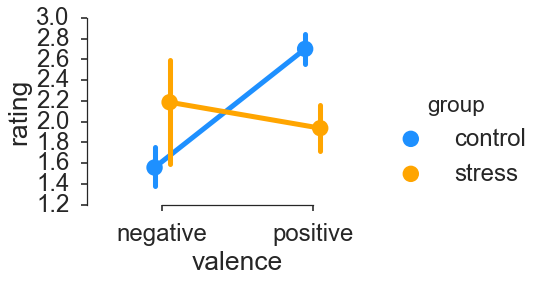

In [93]:
data = d_valence.groupby(['subid', 'group', 'valence']).mean().reset_index()

p = sns.factorplot(x='valence', y='rating', hue='group',
                   palette=['dodgerblue', 'orange'],
                   data=data, ci=68, dodge=.1, aspect=1.5, units='subid')
sns.despine(trim=True)

plt.savefig('/Volumes/group/awagner/sgagnon/SST/analysis/behav/group_inscanratings.png', dpi=300)